Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
from scripts.imports import *
from scripts.data_variables import *

In [2]:
from scripts.get_read_write import *

In [3]:
player_ids = read_player_ids()
pid_len = len(player_ids)
print("IDS:",pid_len)
player_summaries = read_player_summaries()
sum_len = len(player_summaries)
print("SUM:",sum_len)
player_friends = read_player_friends()
fri_len = len(player_friends)
print("FRI:",fri_len)
player_games = read_player_games()
gam_len = len(player_games)
print("GAM:",gam_len)
player_achievements = read_player_achievements()
ach_len = len(player_achievements)
print("ACH:",ach_len)
player_bans = read_player_bans()
ban_len = len(player_bans)
print("BAN:",ban_len)
global_game_stats = read_global_game_stats()
ggs_len = len(global_game_stats)
print("IDS:",ggs_len)
game_names = read_game_names()
gns_len = len(game_names)
print("IDS:",gns_len)

INFO: reading ids
INFO: reading ids finished
IDS: 100000
INFO: reading summaries
INFO: reading summaries finished
SUM: 100000
INFO: reading friends
INFO: reading friends finished
FRI: 27626
INFO: reading games
INFO: reading games finished
GAM: 625
INFO: reading achievements
INFO: reading achievements finished
ACH: 110
INFO: reading bans
INFO: reading bans finished
BAN: 100000
INFO: reading global game stats
INFO: reading global game stats finished
IDS: 61693
INFO: reading game names
INFO: reading game names finished
IDS: 61693


In [4]:
my_id

'76561198101569818'

In [5]:
player_bans["76561197960272169"]

{'cb': False,
 'dslb': 0,
 'eb': 'none',
 'id': '76561197960272169',
 'nogb': 0,
 'novacb': 0,
 'vacb': False}

# Odgovori na vprašanja

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

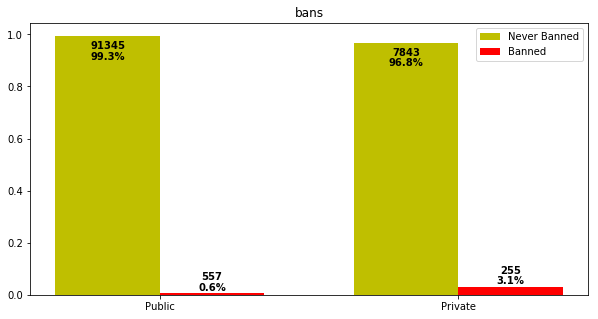

In [6]:
good, bad = get_community_ban_visibility_data(player_summaries, player_bans)
ban_visibility_plot(good, bad, "community_bans_vis.png")

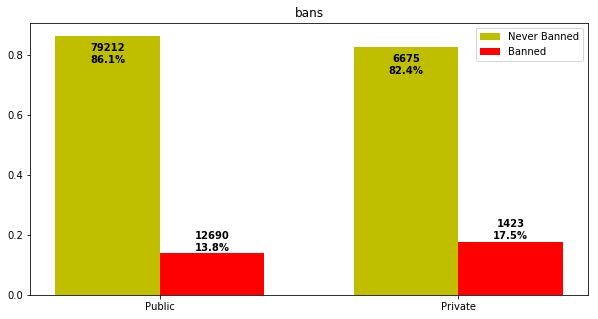

In [7]:
good, bad = get_vac_ban_visibility_data(player_summaries, player_bans)
ban_visibility_plot(good, bad, "vac_bans_vis.png")

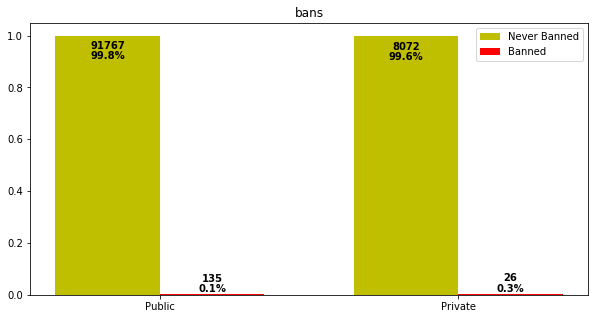

In [8]:
good, bad = get_economy_ban_visibility_data(player_summaries, player_bans)
ban_visibility_plot(good, bad, "economy_bans_vis.png")

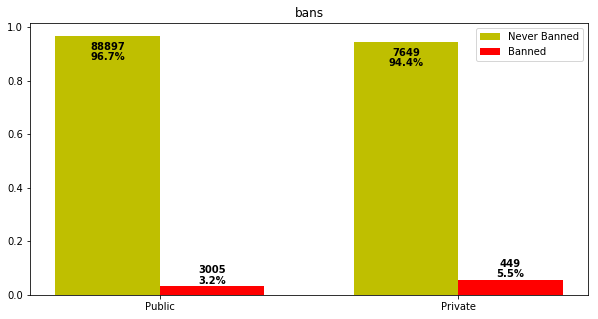

In [9]:
good, bad = get_game_ban_visibility_data(player_summaries, player_bans)
ban_visibility_plot(good, bad, "bame_bans_vis.png")

In [10]:
bans_by_country = dict()
for pid in player_ids:
    try:
        country = player_summaries[pid]["cntry"]
        if country not in bans_by_country:
            bans_by_country[country] = {"ban" : 0, "clean" : 0}
            if player_was_banned(player_bans[pid]):
                bans_by_country[country]["ban"] = bans_by_country[country]["ban"]+1
            else:
                bans_by_country[country]["clean"] = bans_by_country[country]["clean"]+1
        else:
            if player_was_banned(player_bans[pid]):
                bans_by_country[country]["ban"] = bans_by_country[country]["ban"]+1
            else:
                bans_by_country[country]["clean"] = bans_by_country[country]["clean"]+1
    except:
        pass
country_ban_percentages = dict()
for cntry, data in bans_by_country.items():
    if data["ban"]+data["clean"] > 1000:
        country_ban_percentages[cntry] = data["ban"]/(data["ban"]+data["clean"])
    

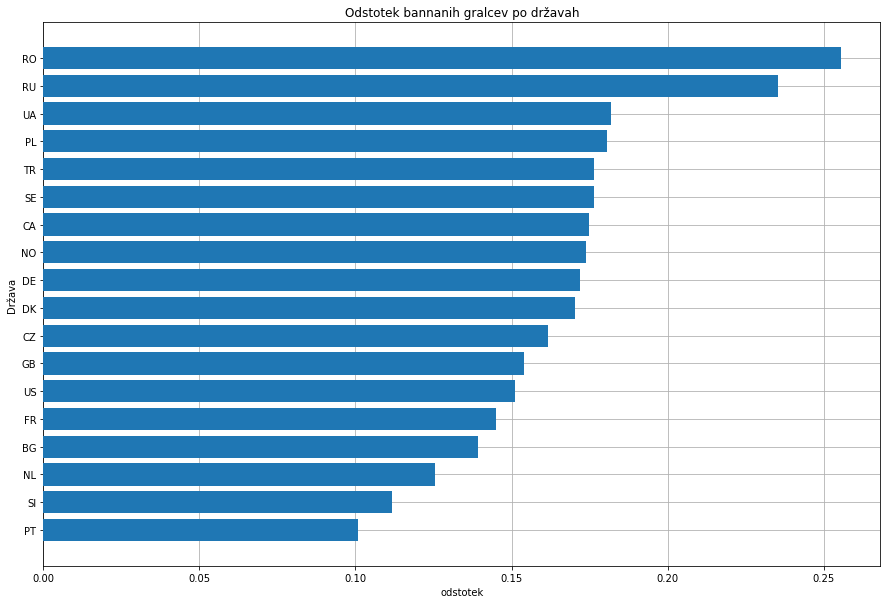

In [11]:
def plot_bans_by_country(bans):
    import numpy as np
    percentage=[]
    countries=[]
    for country,persons in bans:
        countries.append(country)
        percentage.append(persons)
    y_pos = np.arange(len(countries))
    plt.figure(figsize=(15,10))
    plt.grid(zorder=0)
    plt.barh(countries,percentage, align='center', zorder=5)
    #plt.yticks(y_pos, games)
    plt.xlabel("odstotek")
    plt.title('Odstotek bannanih gralcev po državah')
    plt.ylabel("Država")
    plt.savefig("assets/bans_country.png",dpi=200,bbox_inches="tight")
    plt.show()
    return None
plot_bans_by_country(sorted(country_ban_percentages.items(), key=lambda x: x[1]))

In [12]:
bans_by_country_economy = dict()
for pid in player_ids:
    try:
        country = player_summaries[pid]["cntry"]
        if country not in bans_by_country_economy:
            bans_by_country_economy[country] = {"ban" : 0, "clean" : 0}
            if player_bans[pid]["vacb"] != False:
                bans_by_country_economy[country]["ban"] = bans_by_country_economy[country]["ban"]+1
            else:
                bans_by_country_economy[country]["clean"] = bans_by_country_economy[country]["clean"]+1
        else:
            if player_bans[pid]["vacb"] != False:
                bans_by_country_economy[country]["ban"] = bans_by_country_economy[country]["ban"]+1
            else:
                bans_by_country_economy[country]["clean"] = bans_by_country_economy[country]["clean"]+1
    except:
        pass
country_ban_percentages_economy = dict()
for cntry, data in bans_by_country_economy.items():
    if data["ban"]+data["clean"] > 1000:
        country_ban_percentages_economy[cntry] = data["ban"]/(data["ban"]+data["clean"])

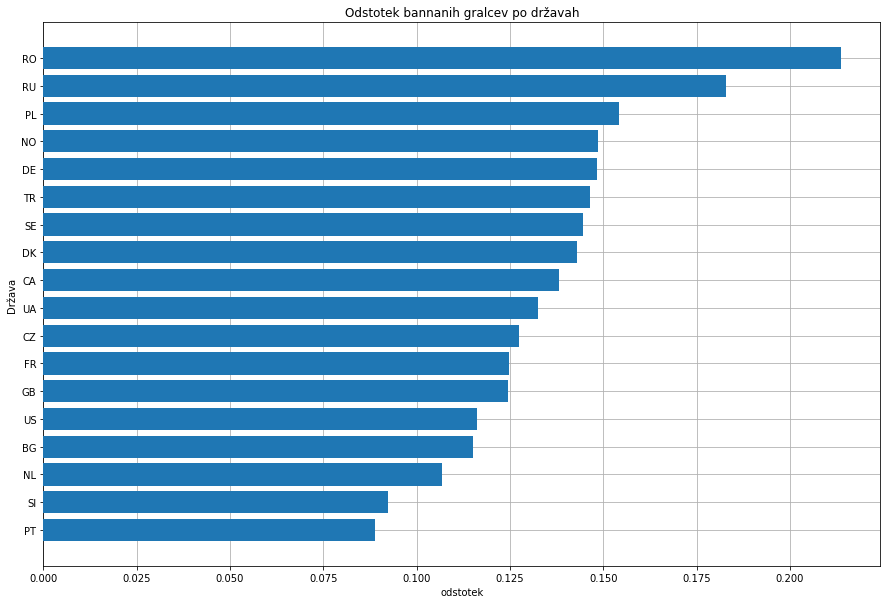

In [13]:
def plot_bans_by_country_economy(bans):
    import numpy as np
    percentage=[]
    countries=[]
    for country,persons in bans:
        countries.append(country)
        percentage.append(persons)
    y_pos = np.arange(len(countries))
    plt.figure(figsize=(15,10))
    plt.grid(zorder=0)
    plt.barh(countries,percentage, align='center', zorder=5)
    #plt.yticks(y_pos, games)
    plt.xlabel("odstotek")
    plt.title('Odstotek bannanih igralcev po državah')
    plt.ylabel("Država")
    plt.savefig("assets/vac_bans_country.png",dpi=200,bbox_inches="tight")
    plt.show()
    return None
plot_bans_by_country(sorted(country_ban_percentages_economy.items(), key=lambda x: x[1]))

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

In [14]:
print

<function print>

### 4. Število prijateljev glede na "starost" računa

### 5. Odvisnost med težavnostjo igre in njenim uspehom